In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ziya07/plant-health-data")

print("Path to dataset files:", path)

100%|██████████| 125k/125k [00:00<00:00, 29.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ziya07/plant-health-data/versions/1


In [ ]:
#بيانات المستشعرات الحيوية المتعلقة بمراقبة صحة النبات.
# وهو يتضمن قياسات مؤرخة زمنيًا للمعلمات البيئية والفسيولوجية المهمة لتقييم صحة النبات،
# مثل رطوبة التربة ودرجة الحرارة والرطوبة وكثافة الضوء ومستويات المغذيات وإشارات إجهاد النبات
#health of the plant, based on soil moisture and nutrient levels. It has three possible values:Healthy,Moderate Stress,High Stress

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [36]:

df = pd.read_csv(path+'/plant_health_data.csv')

In [4]:
df.head()

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress


In [5]:
df.shape

(1200, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1200 non-null   object 
 1   Plant_ID                1200 non-null   int64  
 2   Soil_Moisture           1200 non-null   float64
 3   Ambient_Temperature     1200 non-null   float64
 4   Soil_Temperature        1200 non-null   float64
 5   Humidity                1200 non-null   float64
 6   Light_Intensity         1200 non-null   float64
 7   Soil_pH                 1200 non-null   float64
 8   Nitrogen_Level          1200 non-null   float64
 9   Phosphorus_Level        1200 non-null   float64
 10  Potassium_Level         1200 non-null   float64
 11  Chlorophyll_Content     1200 non-null   float64
 12  Electrochemical_Signal  1200 non-null   float64
 13  Plant_Health_Status     1200 non-null   object 
dtypes: float64(11), int64(1), object(2)
memo

In [8]:
df.isnull().sum()

,0
Timestamp,0
Plant_ID,0
Soil_Moisture,0
Ambient_Temperature,0
Soil_Temperature,0
Humidity,0
Light_Intensity,0
Soil_pH,0
Nitrogen_Level,0
Phosphorus_Level,0


In [9]:
df.duplicated().sum()

0

In [11]:
df.drop('Plant_ID',axis=1, inplace=True)
df.drop('Timestamp',axis=1, inplace=True)


In [12]:
df.head()

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress


<Axes: ylabel='count'>

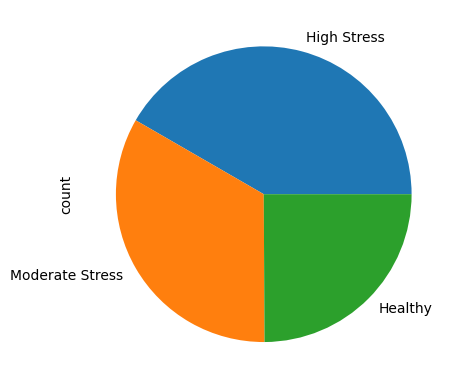

In [13]:
df['Plant_Health_Status'].value_counts().plot(kind='pie')

In [14]:
label_encoder = LabelEncoder()
df['Plant_Health_Status'] = label_encoder.fit_transform(df['Plant_Health_Status'])

In [15]:
scaler = StandardScaler()
X = df.drop(['Plant_Health_Status'], axis=1)
X_scaled = scaler.fit_transform(X)
y = df['Plant_Health_Status']

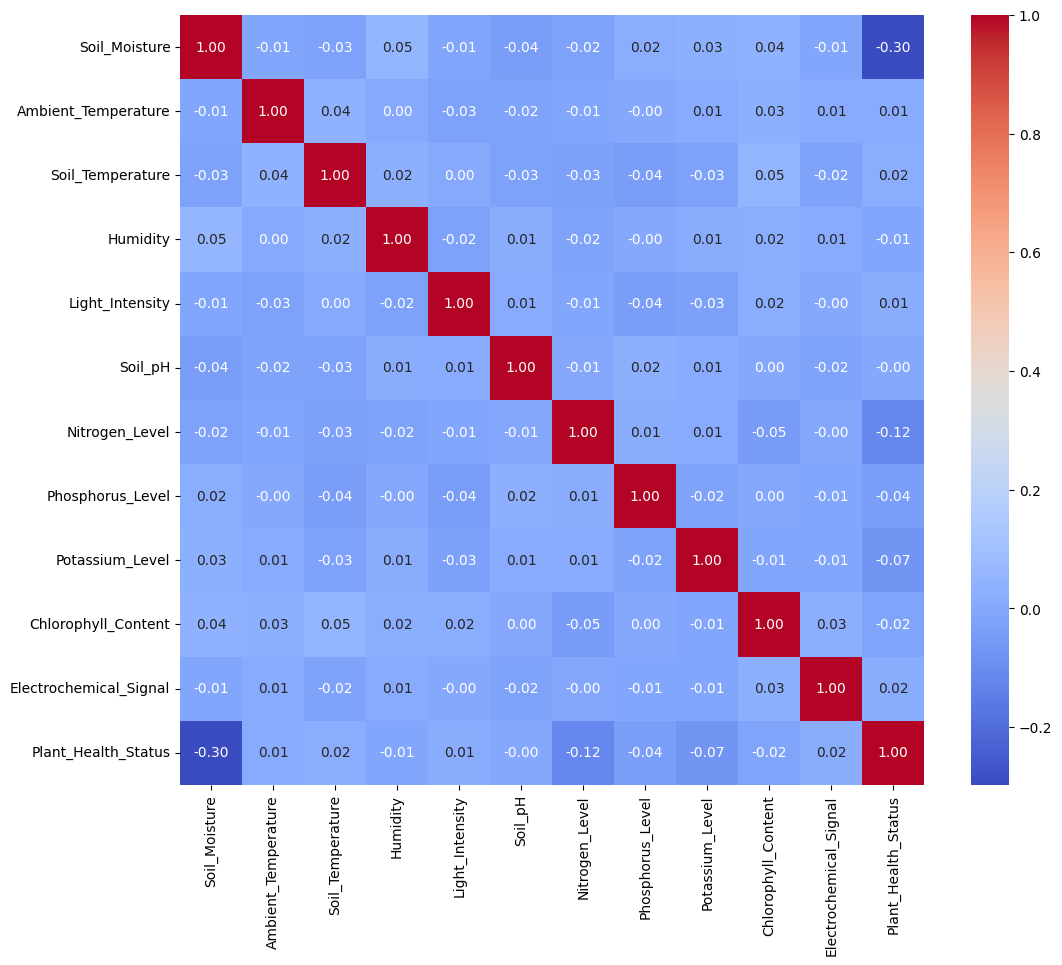

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

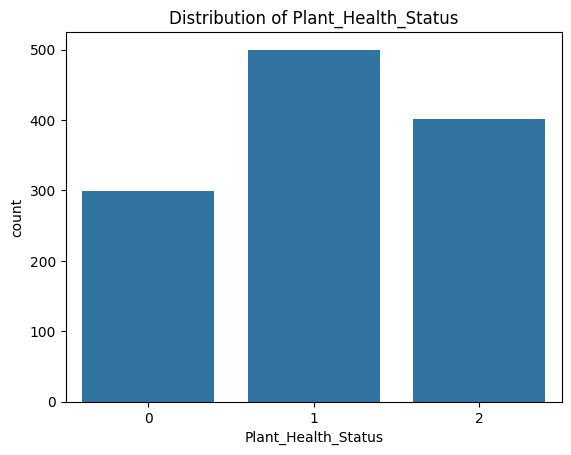

In [21]:
sns.countplot(x='Plant_Health_Status', data=df)
plt.title("Distribution of Plant_Health_Status")
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Predictions
y_pred = rf_model.predict(X_test)

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.8333333333333334


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        65
           1       0.83      0.89      0.86        85
           2       0.83      0.77      0.80        90

    accuracy                           0.83       240
   macro avg       0.83      0.84      0.83       240
weighted avg       0.83      0.83      0.83       240



In [39]:
print(confusion_matrix(y_test, y_pred))

[[55  0 10]
 [ 5 76  4]
 [ 5 16 69]]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [30]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


In [31]:
# Train and evaluate each model
results = {}


In [43]:
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    train_predictions = rf_model.predict(X_train) # predict on train
    training_accuracy = accuracy_score(y_train, train_predictions) # Calculate training accuracy
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy
    print(f"--- {name} ---")
    print(f"Training Accuracy: {training_accuracy:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

--- Logistic Regression ---
Training Accuracy: 1.00
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        65
           1       0.78      0.86      0.82        85
           2       0.74      0.63      0.68        90

    accuracy                           0.77       240
   macro avg       0.77      0.77      0.77       240
weighted avg       0.76      0.77      0.76       240

--- Decision Tree ---
Training Accuracy: 1.00
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      0.99      0.99        85
           2       0.99      1.00      0.99        90

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

--- Random Forest ---
Training Accuracy: 1.00
Accuracy: 1.00
Cla

In [33]:
# Display results summary
print("\nSummary of Accuracies:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.2f}")


Summary of Accuracies:
Logistic Regression: 0.77
Decision Tree: 1.00
Random Forest: 1.00
SVM: 0.82
KNN: 0.70
Naive Bayes: 0.83
